# T2FPharm: Truly Target Focused Pharmacophore Modeler

Author:
- Armin Ariamajd

In [29]:
from opencadd import Protein, interaction, pharmacophore
from ipywidgets import interact
import operator
from pathlib import Path
import numpy as np
import nglview
import matplotlib.pyplot as plt

### Creating a Protein Object

Starting with a PDBQT file for a protein apo structure, a `Protein` object can be created:

In [2]:
RECEPTOR_FILEPATH = "./data/t2fpharm/3w32.pdbqt"
receptor = Protein.from_file(RECEPTOR_FILEPATH)

We also add the protein complex structure to use as reference for visualization:

In [3]:
receptor._structure_filepath = Path.cwd().absolute().parent/"other/data/3w32.pdb"

The Protein object now contains all information from the structure file. For example:

In [4]:
receptor.atom_data

,serial,name,altLoc,resName,chainID,resSeq,iCode,x,y,z,occupancy,tempFactor,partial_charge,autodock_atom_type,hbond_acc,hbond_don,hbond_count
0,1,N,,GLN,A,1,,-0.023,33.326,-4.411,0.0,0.0,0.227,N,False,False,0
1,2,CA,,GLN,A,1,,-0.291,31.978,-3.835,0.0,0.0,0.148,C,False,False,0
2,3,C,,GLN,A,1,,0.946,31.062,-3.957,0.0,0.0,0.262,C,False,False,0
3,4,O,,GLN,A,1,,0.876,29.863,-3.659,0.0,0.0,-0.270,OA,True,False,2
4,5,CB,,GLN,A,1,,-1.501,31.341,-4.517,0.0,0.0,0.073,C,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3077,3078,H,,ASP,A,314,,1.504,32.197,12.460,0.0,0.0,0.150,HD,False,True,1
3078,3079,H,,GLU,A,315,,-1.129,32.587,12.745,0.0,0.0,0.150,HD,False,True,1
3079,3080,H,,TYR,A,316,,-1.720,33.695,10.567,0.0,0.0,0.150,HD,False,True,1
3080,3081,H,,TYR,A,316,,-0.655,36.222,2.529,0.0,0.0,0.292,HD,False,True,1


In [5]:
receptor.trajectory

array([[[-2.3000e-02,  3.3326e+01, -4.4110e+00],
        [-2.9100e-01,  3.1978e+01, -3.8350e+00],
        [ 9.4600e-01,  3.1062e+01, -3.9570e+00],
        ...,
        [-1.7200e+00,  3.3695e+01,  1.0567e+01],
        [-6.5500e-01,  3.6222e+01,  2.5290e+00],
        [-1.2920e+00,  3.2153e+01,  8.6060e+00]]])

In [6]:
receptor.view

NGLWidget()

### Calculating Interaction Fields

Knowing the coordinates and size of the receptor's binding pocket, an interaction field can be created:

In [17]:
RECEPTOR_POCKET_CENTER = (15.91, 32.33, 11.03)
RECEPTOR_POCKET_SIZE = (20, 20, 20)
GRID_SPACING = 0.6

interaction_field = interaction.AutoGridField(
    receptor_filepaths=RECEPTOR_FILEPATH,
    grid_center=RECEPTOR_POCKET_CENTER,
    grid_size=RECEPTOR_POCKET_SIZE,
    grid_spacing=GRID_SPACING,
)

The interaction field has a `Grid` object, which contains information about the grid. For example:

In [18]:
interaction_field.grid.center

(15.91, 32.33, 11.03)

In [19]:
interaction_field.grid.size

(20.4, 20.4, 20.4)

In [20]:
interaction_field.grid.shape

(35, 35, 35)

In [21]:
interaction_field.grid.point_count

42875

In [22]:
interaction_field.grid.coordinates

array([[[[ 5.71, 22.13,  0.83],
         [ 5.71, 22.13,  1.43],
         [ 5.71, 22.13,  2.03],
         ...,
         [ 5.71, 22.13, 20.03],
         [ 5.71, 22.13, 20.63],
         [ 5.71, 22.13, 21.23]],

        [[ 5.71, 22.73,  0.83],
         [ 5.71, 22.73,  1.43],
         [ 5.71, 22.73,  2.03],
         ...,
         [ 5.71, 22.73, 20.03],
         [ 5.71, 22.73, 20.63],
         [ 5.71, 22.73, 21.23]],

        [[ 5.71, 23.33,  0.83],
         [ 5.71, 23.33,  1.43],
         [ 5.71, 23.33,  2.03],
         ...,
         [ 5.71, 23.33, 20.03],
         [ 5.71, 23.33, 20.63],
         [ 5.71, 23.33, 21.23]],

        ...,

        [[ 5.71, 41.33,  0.83],
         [ 5.71, 41.33,  1.43],
         [ 5.71, 41.33,  2.03],
         ...,
         [ 5.71, 41.33, 20.03],
         [ 5.71, 41.33, 20.63],
         [ 5.71, 41.33, 21.23]],

        [[ 5.71, 41.93,  0.83],
         [ 5.71, 41.93,  1.43],
         [ 5.71, 41.93,  2.03],
         ...,
         [ 5.71, 41.93, 20.03],
         [ 5

It also contains all the field values. For example:

In [13]:
interaction_field.electrostatic

array([[[[ 6.000e-03, -1.570e-01, -3.040e-01, ...,  3.170e-01,
           5.480e-01,  4.000e-01],
         [ 1.800e-02, -1.190e-01, -2.430e-01, ...,  8.490e-01,
           1.207e+00,  8.100e-01],
         [ 5.300e-02, -4.800e-02, -1.500e-01, ...,  1.248e+00,
           1.696e+00,  1.138e+00],
         ...,
         [-2.278e+00, -1.697e+00, -1.357e+00, ...,  4.440e-01,
           1.575e+00,  1.615e+00],
         [-1.913e+00, -1.418e+00, -1.117e+00, ...,  4.690e-01,
           1.040e+00,  9.520e-01],
         [-1.238e+00, -1.019e+00, -9.560e-01, ...,  3.690e-01,
           8.980e-01,  8.130e-01]],

        [[-1.400e-02, -4.040e-01, -6.810e-01, ...,  8.020e-01,
           9.420e-01,  6.010e-01],
         [ 6.700e-02, -1.930e-01, -4.040e-01, ...,  2.069e+00,
           2.938e+00,  1.368e+00],
         [ 1.590e-01,  0.000e+00, -1.540e-01, ...,  3.371e+00,
           4.584e+00,  1.892e+00],
         ...,
         [-1.564e+00, -1.221e+00, -9.500e-01, ...,  5.940e-01,
           1.759e+00,  1.

In [14]:
interaction_field.h_bond_donor

array([[[[-4.41000015e-01, -4.83999997e-01, -4.00999993e-01, ...,
           2.48959999e+01,  1.81739998e+01,  4.60200024e+00],
         [-2.68999994e-01, -3.70999992e-01, -2.98000008e-01, ...,
           3.82950989e+02,  8.11007019e+02,  7.66760025e+01],
         [-1.22000001e-01, -1.58999994e-01, -1.26000002e-01, ...,
           1.04442798e+03,  3.80377393e+03,  2.04746002e+02],
         ...,
         [-2.72000015e-01, -3.19999993e-01,  1.06500006e+00, ...,
           3.33171997e+02,  1.00006078e+05,  1.00002266e+05],
         [ 1.66799998e+00,  2.23000005e-01,  4.39999998e-02, ...,
           7.30510025e+01,  3.83376099e+03,  7.89318115e+03],
         [ 1.30167007e+02,  1.20310001e+01,  3.23000014e-01, ...,
           2.60599995e+01,  1.30358994e+02,  8.75940018e+01]],

        [[-5.74000001e-01, -1.97999999e-01,  5.63000023e-01, ...,
           9.40179977e+01,  1.10575996e+02,  2.05470009e+01],
         [-4.97000009e-01, -3.77000004e-01, -2.17999995e-01, ...,
           9.26442480e

In [16]:
interaction_field.temporal_length

1

In [15]:
interaction_field.tensor

array([[[[[-4.41000015e-01, -1.93000004e-01,  1.02699995e+00,
            1.08099997e+00,  6.00000005e-03,  6.51000023e-01],
          [-4.83999997e-01,  5.82000017e-01,  4.27799988e+00,
            4.33500004e+00, -1.57000005e-01,  6.81999981e-01],
          [-4.00999993e-01,  1.12100005e+00,  6.48699999e+00,
            6.54500008e+00, -3.03999990e-01,  7.02000022e-01],
          ...,
          [ 2.48959999e+01,  7.34541992e+02,  2.28131812e+03,
            2.28139502e+03,  3.17000002e-01,  9.25000012e-01],
          [ 1.81739998e+01,  5.33448975e+02,  1.65189905e+03,
            1.65197400e+03,  5.47999978e-01,  9.07999992e-01],
          [ 4.60200024e+00,  1.42584000e+02,  4.46341003e+02,
            4.46414001e+02,  4.00000006e-01,  8.88000011e-01]],

         [[-2.68999994e-01, -3.84000003e-01,  4.33999985e-01,
            4.92000014e-01,  1.79999992e-02,  6.99999988e-01],
          [-3.70999992e-01, -1.00000001e-01,  1.71899998e+00,
            1.77800000e+00, -1.19000003e-01,  

Since the interaction fields are numpy arrays, vectorized calculations can be perfomed easily on the whole data. For example, to get the minimum and maximum energies:

In [41]:
interaction_field.h_bond_donor.min()

-0.723

In [42]:
interaction_field.h_bond_donor.max()

107879.125

Or, to visualize the distribution:

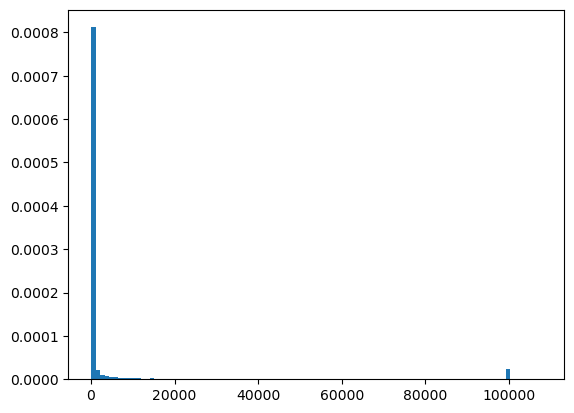

In [39]:
plt.hist(interaction_field.h_bond_donor.flatten(), bins=100, density=True)
plt.show()

to get all the grid points that have a hydrogen-bond-donor energy smaller than -0.5:

In [24]:
sample_mask = interaction_field.h_bond_donor < -0.5
sample_mask

array([[[[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]],

        [[ True, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]],

        [[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, Fa

To count the number of grid points fulfilling the condition:

In [46]:
count_mask = np.count_nonzero(sample_mask)
count_mask

1535

To get the percentage:

In [28]:
100*count_mask/interaction_field.grid.point_count

3.5801749271137027

To get the points that have an energy higher than 5 in all probe fields:

In [44]:
sample_mask2 = np.all(interaction_field.van_der_waals > 5, axis=-1)
sample_mask2

array([[[[False, False, False, ...,  True,  True, False],
         [False, False, False, ...,  True,  True,  True],
         [False, False, False, ...,  True,  True,  True],
         ...,
         [False, False, False, ...,  True,  True,  True],
         [False, False, False, ...,  True,  True,  True],
         [ True,  True, False, ...,  True,  True,  True]],

        [[False, False, False, ...,  True,  True,  True],
         [False, False, False, ...,  True,  True,  True],
         [False, False, False, ...,  True,  True,  True],
         ...,
         [False, False, False, ...,  True,  True,  True],
         [False, False, False, ...,  True,  True,  True],
         [ True,  True, False, ...,  True,  True,  True]],

        [[False,  True,  True, ...,  True,  True,  True],
         [False,  True,  True, ...,  True,  True,  True],
         [False, False, False, ...,  True,  True,  True],
         ...,
         [False, False, False, ...,  True,  True,  True],
         [False, False, Fa

In [47]:
sample_count2 = np.count_nonzero(sample_mask2)

In [48]:
100*sample_count2/interaction_field.grid.point_count

39.7597667638484

### Pharmacophore Modeling

Using the interaction field and protein objects, a pharmacophore model can be instantiated:

In [49]:
t2f = pharmacophore.T2FPharm(
    receptor=receptor,
    interaction_field=interaction_field
)

Interaction fields can be visualized instantly:

In [55]:
view = t2f.visualize(
    weights1=t2f.field.h_bond_donor
)
view.display(gui=True)

NGLWidget(gui_style='ngl')

However, since some very large numbers exist in the field data, the color mapping becomes distorted. To remedy this, one option is to filter the points with high energy.
For this, the vanacies can be used:

In [59]:
view = t2f.visualize(
    grid_mask=t2f.vacancy[0],
    weights1=t2f.field.h_bond_donor[t2f.vacancy]
)
view.display(gui=True)

NGLWidget(gui_style='ngl')

Vacancies can be viewed:

In [60]:
t2f.vacancy

array([[[[ True,  True,  True, ..., False, False, False],
         [ True,  True,  True, ..., False, False, False],
         [ True,  True,  True, ..., False, False, False],
         ...,
         [ True,  True, False, ..., False, False, False],
         [False,  True,  True, ..., False, False, False],
         [False, False,  True, ..., False, False, False]],

        [[ True,  True,  True, ..., False, False, False],
         [ True,  True,  True, ..., False, False, False],
         [ True,  True,  True, ..., False, False, False],
         ...,
         [ True,  True,  True, ..., False, False, False],
         [False,  True,  True, ..., False, False, False],
         [False, False,  True, ..., False, False, False]],

        [[False, False, False, ..., False, False, False],
         [ True, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [ True,  True,  True, ..., False, False, False],
         [ True,  True,  T

or re-calculated with custom specifications:

In [61]:
t2f.calculate_vacancy(
energy_cutoff=0.1,
mode="min"
)

array([[[[ True,  True,  True, ..., False, False, False],
         [ True,  True,  True, ..., False, False, False],
         [ True,  True,  True, ..., False, False, False],
         ...,
         [ True,  True, False, ..., False, False, False],
         [False, False,  True, ..., False, False, False],
         [False, False, False, ..., False, False, False]],

        [[ True,  True, False, ..., False, False, False],
         [ True,  True,  True, ..., False, False, False],
         [ True,  True,  True, ..., False, False, False],
         ...,
         [ True,  True,  True, ..., False, False, False],
         [False, False,  True, ..., False, False, False],
         [False, False, False, ..., False, False, False]],

        [[False, False, False, ..., False, False, False],
         [ True, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [ True,  True,  True, ..., False, False, False],
         [False,  True,  T

and visualized:

In [62]:
view = t2f.visualize(
    grid_mask=t2f.vacancy[0],
)
view.display(gui=True)

NGLWidget(gui_style='ngl')

It can also be re-calculated and visualized interactively:

In [63]:
@interact(energy_cutoff=(-1,3,0.1))
def visualize_vacancy(energy_cutoff):
    view = t2f.visualize(
    t2f.calculate_vacancy(energy_cutoff=energy_cutoff)[0],
    )
    return view.display(gui=True)

interactive(children=(FloatSlider(value=1.0, description='energy_cutoff', max=3.0, min=-1.0), Output()), _dom_…

We can also create other interactive plots, for example, to find hotspots for hydrophobic interactions:

In [67]:
@interact(max_energy=(-1,0,0.1))
def visualize_hotspots(max_energy):
    view = t2f.visualize(
        grid_mask=(t2f.field.hydrophobic<max_energy)[0]
    )
    return view.display(gui=True)

interactive(children=(FloatSlider(value=-1.0, description='max_energy', max=0.0, min=-1.0), Output()), _dom_cl…

PSP distances can be viewed:

In [68]:
t2f.psp_distances

array([[[[[        nan,         nan,         nan, ...,         nan,
                   nan,         nan],
          [        nan,         nan,         nan, ...,         nan,
                   nan,         nan],
          [        nan,         nan,         nan, ...,         nan,
                   nan,         nan],
          ...,
          [        nan,         nan,         nan, ...,         nan,
                   nan,         nan],
          [        nan,         nan,         nan, ...,         nan,
                   nan,         nan],
          [        nan,         nan,         nan, ...,         nan,
                   nan,         nan]],

         [[        nan,         nan,         nan, ...,         nan,
                   nan,         nan],
          [        nan,         nan,         nan, ...,         nan,
                   nan,         nan],
          [        nan,         nan,         nan, ...,         nan,
                   nan,         nan],
          ...,
          [   

Or re-calculated:

In [69]:
t2f.calculate_psp_distances(
    vacancy=t2f.calculate_vacancy(),
    num_directions=13
)

array([[[[[        nan,         nan,         nan, ...,         nan,
                   nan,         nan],
          [        nan,         nan,         nan, ...,         nan,
                   nan,         nan],
          [        nan,         nan,         nan, ...,         nan,
                   nan,         nan],
          ...,
          [        nan,         nan,         nan, ...,         nan,
                   nan,         nan],
          [        nan,         nan,         nan, ...,         nan,
                   nan,         nan],
          [        nan,         nan,         nan, ...,         nan,
                   nan,         nan]],

         [[        nan,         nan,         nan, ...,         nan,
                   nan,         nan],
          [        nan,         nan,         nan, ...,         nan,
                   nan,         nan],
          [        nan,         nan,         nan, ...,         nan,
                   nan,         nan],
          ...,
          [   

Each time a property is re-calculated, the property will be updated with the lastest calculated values:

In [70]:
t2f.psp_distances.shape

(1, 35, 35, 35, 13)

To visualize buriedness interactively:

In [75]:
@interact(energy_cutoff=(-1,1,0.1), psp_max_length=(0,20,0.1), psp_min_count=(0,13,1))
def visualize_buriedness(energy_cutoff, psp_max_length, psp_min_count):
    view = t2f.visualize(
    grid_mask=t2f.calculate_buriedness(
        vacancy=t2f.calculate_vacancy(energy_cutoff=energy_cutoff),
        psp_max_length=psp_max_length, 
        psp_min_count=psp_min_count)[0],
    weights1=(1,0.5,0)
    )
    return view.display(gui=True)

interactive(children=(FloatSlider(value=0.0, description='energy_cutoff', max=1.0, min=-1.0), FloatSlider(valu…

To calculate distances to protein atoms:

In [76]:
t2f.calculate_distances_to_protein_atoms()

array([[[[[13.62665718, 12.44014992, 11.19784305, ..., 16.84527512,
           15.55584424, 14.48981397],
          [13.40733329, 12.2278097 , 10.95478384, ..., 17.19906085,
           15.63275695, 14.82045576],
          [13.21163828, 12.0416498 , 10.73978068, ..., 17.56622025,
           15.73219279, 15.1676336 ],
          ...,
          [18.79019388, 18.55428064, 17.61280469, ..., 32.03598124,
           25.99742083, 29.61744602],
          [19.24011918, 19.02796179, 18.10708395, ..., 32.57895784,
           26.48215796, 30.16495167],
          [19.69804523, 19.50859631, 18.60758149, ..., 33.12390216,
           26.9715311 , 30.71441858]],

         [[14.12377379, 12.9203301 , 11.6820413 , ..., 17.26271398,
           16.10138783, 14.91114714],
          [13.91228903, 12.71601077, 11.44926587, ..., 17.60811444,
           16.17570679, 15.23264616],
          [13.72379634, 12.53710214, 11.2437222 , ..., 17.96691665,
           16.27182504, 15.57063611],
          ...,
          [19.

In [77]:
t2f.count_hbonding_atoms_in_radius()

array([[[[[1, 1],
          [1, 0],
          [0, 0],
          ...,
          [0, 0],
          [0, 0],
          [0, 0]],

         [[1, 1],
          [1, 1],
          [0, 1],
          ...,
          [0, 0],
          [0, 0],
          [0, 0]],

         [[1, 1],
          [1, 1],
          [0, 1],
          ...,
          [0, 0],
          [0, 0],
          [0, 0]],

         ...,

         [[0, 0],
          [0, 0],
          [0, 0],
          ...,
          [0, 0],
          [0, 0],
          [0, 0]],

         [[0, 0],
          [0, 0],
          [0, 0],
          ...,
          [0, 0],
          [0, 0],
          [0, 0]],

         [[0, 0],
          [0, 0],
          [0, 0],
          ...,
          [0, 0],
          [0, 0],
          [0, 0]]],


        [[[1, 0],
          [0, 0],
          [0, 0],
          ...,
          [0, 0],
          [0, 0],
          [0, 0]],

         [[1, 0],
          [0, 0],
          [0, 0],
          ...,
          [0, 0],
          [0, 0],
   

In [82]:
t2f.hbonding_atoms_count.shape

(1, 35, 35, 35, 2)

In [86]:
np.count_nonzero(t2f.hbonding_atoms_count)

112

In [88]:
view=t2f.visualize(
    grid_mask=t2f.hbonding_atoms_count[0,...,1]>0
)
view.display(gui=True)

NGLWidget(gui_style='ngl')